In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
raw_data = pd.read_csv("./datasets/ProductDetail.csv")

In [134]:
product_id = raw_data["Filename"].str.replace(".csv", "")
# brand_name = raw_data["Name"].str.split(" ").str[0]
raw_name = raw_data["Name"].str.split(" ").str[0]
names = {'Name': raw_name}          
unclean_brand_name = pd.DataFrame(names)
unclean_brand_name['Name'] = unclean_brand_name['Name'].apply(lambda x: x.lower())
# unclean_brand_name['Name'] = unclean_brand_name['Name'].apply(lambda x: x.capitalize())
brand_name = unclean_brand_name['Name']
model_name = raw_data["Name"].str.split(" ").str[1] + " " + raw_data["Name"].str.split(" ").str[2]
structured_data = pd.DataFrame(list(zip(product_id, brand_name, model_name)), columns=["Product ID", "Brand", "Model"])

In [135]:
ProductName = raw_data['Name']

In [136]:
brand_count = brand_name.value_counts()
brand_count

# LessCount = brand_name.value_counts().loc[lambda x:x < 50]
# LessCount

Name
dell          324
asus          318
acer          316
lenovo        238
hp            166
msi            78
laptop         37
apple          26
avita           9
microsoft       5
mi              5
modern          5
honor           4
aspire          4
dynabook        3
gp76            3
gp66            3
ryzen           3
xlab            3
macbook         3
gateway         3
chuwi           3
gf63            2
razer           2
nova            2
summit          2
predator        1
level51         1
nitro           1
gigabyte        1
delta           1
toshiba         1
pavilion        1
amd             1
2024            1
vaio            1
i7              1
great           1
vostro          1
newly           1
creator         1
chiwi           1
expertbook      1
dua             1
huawei          1
original        1
Name: count, dtype: int64

In [137]:
series = structured_data['Brand']
series


0        apple
1        apple
2       lenovo
3         acer
4           hp
         ...  
1582    lenovo
1583      dell
1584        hp
1585    lenovo
1586    laptop
Name: Brand, Length: 1587, dtype: object

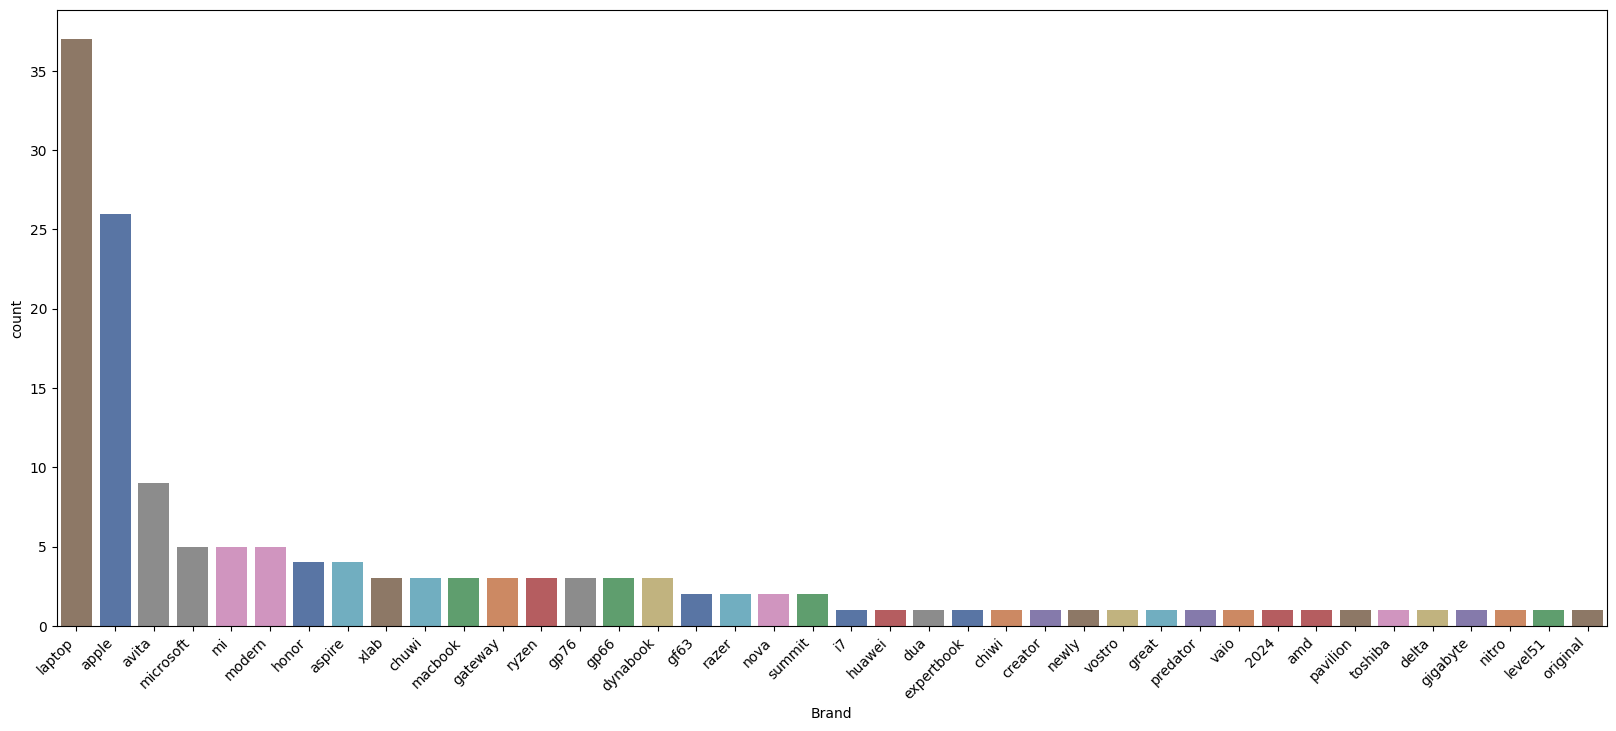

In [138]:
LessCount = brand_name.value_counts().loc[lambda x:x < 50]
brand_order = LessCount.sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right')
brand_plot = sns.countplot(structured_data, x = "Brand", order=brand_order, hue="Brand", palette="deep")

In [139]:
laptop = brand_name 

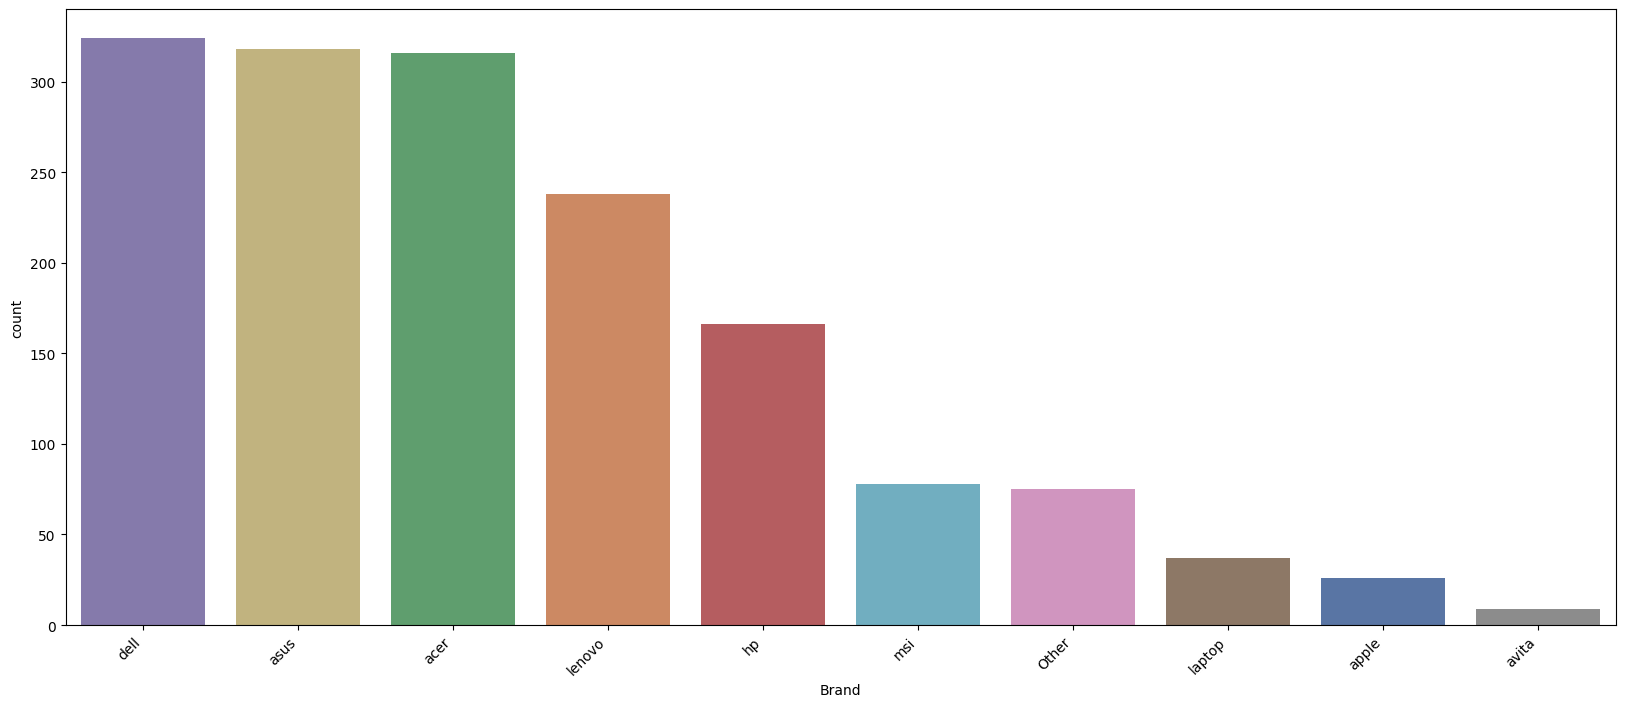

In [140]:
brand_count = brand_name.value_counts()
brand_to_merge = brand_count[brand_count.isin([1, 2, 3, 4, 5])].index
structured_data['Brand'] = structured_data['Brand'].apply(lambda x: 'Other' if x in brand_to_merge else x)
brand_after_merge = structured_data['Brand'].value_counts()
brand_after_merge_order = brand_after_merge.sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right')
brand_plot = sns.countplot(structured_data, x = "Brand", order=brand_after_merge_order, hue="Brand", palette="deep")

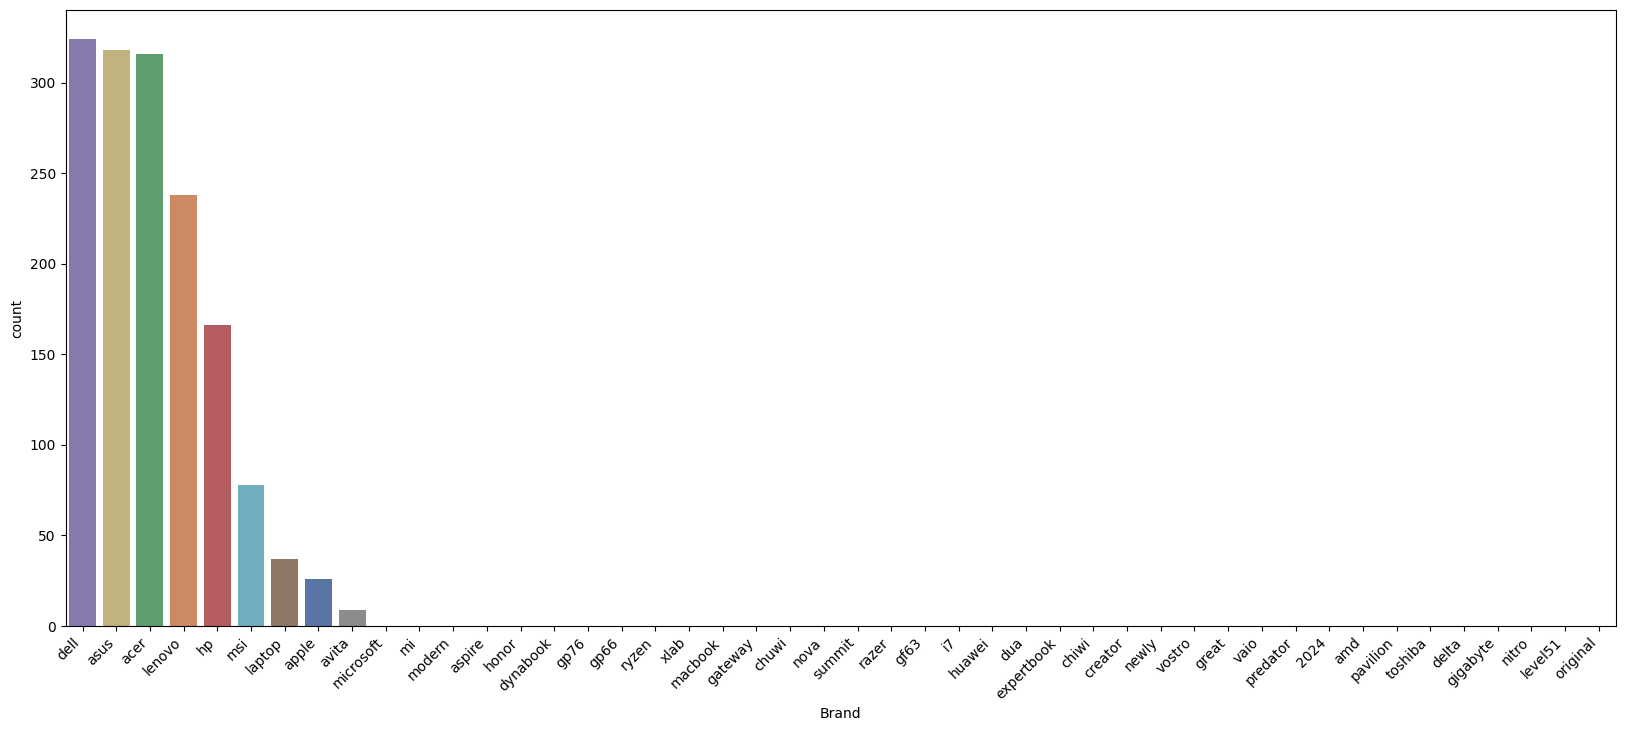

In [141]:
brand_count = brand_name.value_counts()
brand_order = brand_count.sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right')
brand_plot = sns.countplot(structured_data, x = "Brand", order=brand_order, hue="Brand", palette="deep")